This notebook is based on the SciPy NumPy tutorial.

Note that the traditional way to import `numpy` is to rename it `np`.  This saves on typing and makes your code a little more compact.

In [1]:
import numpy as np

# Array Creation and Properties

Here we create an array using `arange` and then change its shape to be 3 rows and 5 columns. 

Note the row-major ordering -- you'll see that the rows are together in the inner []

In [2]:
a = np.arange(15).reshape(3,5)

print(a)

[[ 0  1  2  3  4]
 [ 5  6  7  8  9]
 [10 11 12 13 14]]


A numpy array has a lot of meta-data associated with it describing its shape, datatype, etc.

In [3]:
print(a.ndim)
print(a.shape)
print(a.size)
print(a.dtype)
print(a.itemsize)
print(type(a))

2
(3, 5)
15
int64
8
<class 'numpy.ndarray'>


We can create an array from a list.

In [4]:
b = np.array([1.0, 2.0, 3.0, 4.0])
print(b)
print(b.dtype)

[ 1.  2.  3.  4.]
float64


We can create a multi-dimensional array of a specified size initialized all to 0 easily.  There is also an analogous ones() and empty() array routine.  Note that here we explicitly set the datatype for the array. 

Unlike lists in python, all of the elements of a numpy array are of the same datatype.

In [5]:
c = np.zeros((10, 7), dtype=np.float64)
print(c)

[[ 0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.]]


`linspace` (and `logspace`) create arrays with evenly space (in log) numbers.  For `logspace`, you specify the start and ending powers (`base**start` to `base**stop`)

In [6]:
d = np.linspace(0, 1, 11, endpoint=True)
print(d)

[ 0.   0.1  0.2  0.3  0.4  0.5  0.6  0.7  0.8  0.9  1. ]


In [7]:
e = np.logspace(-1, 2, 15, endpoint=False, base=10)
print(e)

[  0.1          0.15848932   0.25118864   0.39810717   0.63095734   1.
   1.58489319   2.51188643   3.98107171   6.30957344  10.          15.84893192
  25.11886432  39.81071706  63.09573445]


As always, as for help -- the numpy functions have very nice docstrings.

In [8]:
help(np.logspace)

Help on function logspace in module numpy.core.function_base:

logspace(start, stop, num=50, endpoint=True, base=10.0, dtype=None)
    Return numbers spaced evenly on a log scale.
    
    In linear space, the sequence starts at ``base ** start``
    (`base` to the power of `start`) and ends with ``base ** stop``
    (see `endpoint` below).
    
    Parameters
    ----------
    start : float
        ``base ** start`` is the starting value of the sequence.
    stop : float
        ``base ** stop`` is the final value of the sequence, unless `endpoint`
        is False.  In that case, ``num + 1`` values are spaced over the
        interval in log-space, of which all but the last (a sequence of
        length ``num``) are returned.
    num : integer, optional
        Number of samples to generate.  Default is 50.
    endpoint : boolean, optional
        If true, `stop` is the last sample. Otherwise, it is not included.
        Default is True.
    base : float, optional
        The base o

We can also initialize an array based on a function.

In [9]:
f = np.fromfunction(lambda i, j: i + j, (3, 3), dtype=int)
f

array([[0, 1, 2],
       [1, 2, 3],
       [2, 3, 4]])

In [10]:
def myFun(x,y): 
    return 10*x+y

g = np.fromfunction(myFun, (5,4), dtype=int)
g

array([[ 0,  1,  2,  3],
       [10, 11, 12, 13],
       [20, 21, 22, 23],
       [30, 31, 32, 33],
       [40, 41, 42, 43]])

# Array Operations

Most operations will work on an entire array at once.

In [11]:
a = np.arange(12).reshape(3,4)
print(a)

[[ 0  1  2  3]
 [ 4  5  6  7]
 [ 8  9 10 11]]


In [12]:
a.sum(axis=0)

array([12, 15, 18, 21])

In [13]:
a.sum()

66

In [14]:
print(a.min(), a.max())

0 11


### Universal Functions

In [15]:
b = a * np.pi / 12.0
print(b)

[[ 0.          0.26179939  0.52359878  0.78539816]
 [ 1.04719755  1.30899694  1.57079633  1.83259571]
 [ 2.0943951   2.35619449  2.61799388  2.87979327]]


In [16]:
c = np.cos(b)
print(c)

[[  1.00000000e+00   9.65925826e-01   8.66025404e-01   7.07106781e-01]
 [  5.00000000e-01   2.58819045e-01   6.12323400e-17  -2.58819045e-01]
 [ -5.00000000e-01  -7.07106781e-01  -8.66025404e-01  -9.65925826e-01]]


In [17]:
d = b + c 

In [18]:
print(d)

[[ 1.          1.22772521  1.38962418  1.49250494]
 [ 1.54719755  1.56781598  1.57079633  1.57377667]
 [ 1.5943951   1.64908771  1.75196847  1.91386744]]


# Slicing

Slicing works very similarly to how we saw with strings.

In [19]:
a = np.fromfunction(myFun, (5,4), dtype=int)
print(a)

[[ 0  1  2  3]
 [10 11 12 13]
 [20 21 22 23]
 [30 31 32 33]
 [40 41 42 43]]


Giving a single index (0-based) for each dimension just references a single value in the array.

In [20]:
a[1, 1]

11

Doing slices will access a range of elements.  Think of the start and stop in the slice as referencing the left-edge of the slots in the array.

In [21]:
a[0:2, 0:2]

array([[ 0,  1],
       [10, 11]])

In [22]:
a[:, 1]

array([ 1, 11, 21, 31, 41])

Sometimes we want a one-dimensional view into the array -- here we see the memory layout (row-major) more explicitly.

In [23]:
a.flatten()

array([ 0,  1,  2,  3, 10, 11, 12, 13, 20, 21, 22, 23, 30, 31, 32, 33, 40,
       41, 42, 43])

We can also iterate -- this is done over the first axis

In [24]:
for row in a:
    print(row)

[0 1 2 3]
[10 11 12 13]
[20 21 22 23]
[30 31 32 33]
[40 41 42 43]


or element by element

In [25]:
for e in a.flat:
    print(e)

0
1
2
3
10
11
12
13
20
21
22
23
30
31
32
33
40
41
42
43


In [26]:
help(a.flatten())

Help on ndarray object:

class ndarray(builtins.object)
 |  ndarray(shape, dtype=float, buffer=None, offset=0,
 |          strides=None, order=None)
 |  
 |  An array object represents a multidimensional, homogeneous array
 |  of fixed-size items.  An associated data-type object describes the
 |  format of each element in the array (its byte-order, how many bytes it
 |  occupies in memory, whether it is an integer, a floating point number,
 |  or something else, etc.)
 |  
 |  Arrays should be constructed using `array`, `zeros` or `empty` (refer
 |  to the See Also section below).  The parameters given here refer to
 |  a low-level method (`ndarray(...)`) for instantiating an array.
 |  
 |  For more information, refer to the `numpy` module and examine the
 |  the methods and attributes of an array.
 |  
 |  Parameters
 |  ----------
 |  (for the __new__ method; see Notes below)
 |  
 |  shape : tuple of ints
 |      Shape of created array.
 |  dtype : data-type, optional
 |      Any o

# Copying Arrays

Simply using "=" does not make a copy, but much like with lists, you will just have multiple names pointing to the same ndarray object.

In [27]:
a = np.arange(10)
print(a)


[0 1 2 3 4 5 6 7 8 9]


In [28]:
b = a
b is a

True

Since `b` and `a` are the same, changes to the shape of one are reflected in the other -- no copy is made.

In [29]:
b.shape = (2,5)
print(b)
a.shape

[[0 1 2 3 4]
 [5 6 7 8 9]]


(2, 5)

In [30]:
b is a

True

In [31]:
print(a)

[[0 1 2 3 4]
 [5 6 7 8 9]]


A shallow copy creates a new *view* into the array -- the data is the same, but the array properties can be different.

In [32]:
a = np.arange(12)
c = a[:]
a.shape = (3, 4)

print(a)
print(c)

[[ 0  1  2  3]
 [ 4  5  6  7]
 [ 8  9 10 11]]
[ 0  1  2  3  4  5  6  7  8  9 10 11]


Since the underlying data is the same memory, changing an element of one is reflected in the other.

In [33]:
c[1] = -1
print(a)

[[ 0 -1  2  3]
 [ 4  5  6  7]
 [ 8  9 10 11]]


In [34]:
d = c[3:8]
print(d)

[3 4 5 6 7]


In [35]:
d[:] =0 

In [36]:
print(a)
print(c)
print(d)

[[ 0 -1  2  0]
 [ 0  0  0  0]
 [ 8  9 10 11]]
[ 0 -1  2  0  0  0  0  0  8  9 10 11]
[0 0 0 0 0]


In [37]:
print(c is a)
print(c.base is a)
print(c.flags.owndata)
print(a.flags.owndata)

False
True
False
True


To make a copy of the data of the array that you can deal with independently of the original, you need a deep copy.

In [38]:
d = a.copy()
d[:, :] = 0.0

print(a)
print(d)

[[ 0 -1  2  0]
 [ 0  0  0  0]
 [ 8  9 10 11]]
[[0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]]


# Boolean Indexing

In [39]:
a = np.arange(12).reshape(3, 4)
a

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11]])

In [40]:
a[a > 4] = 0
a

array([[0, 1, 2, 3],
       [4, 0, 0, 0],
       [0, 0, 0, 0]])

In [41]:
a[a == 0] = -1
a

array([[-1,  1,  2,  3],
       [ 4, -1, -1, -1],
       [-1, -1, -1, -1]])

If we have 2 tests, we need to use `logical_and()` or `logical_or()`.

In [42]:
a = np.arange(12).reshape(3, 4)
a[np.logical_and(a > 3, a <= 9)] = 0.0
a

array([[ 0,  1,  2,  3],
       [ 0,  0,  0,  0],
       [ 0,  0, 10, 11]])

In [43]:
a > 4

array([[False, False, False, False],
       [False, False, False, False],
       [False, False,  True,  True]], dtype=bool)

# Avoiding Loops

In general, you want to avoid loops over elements of an array.  Here we look at a 2-d gaussian and create an average over angles.

Start by initialize coordinate arrays and a Gaussian function.

In [44]:
# create 1-d x and y arrays -- we define the coordinate values such that
# they are centered in the bin
N = 32
xmin = ymin = 0.0
xmax = ymax = 1.0

dx = (xmax - xmin)/N
x = np.linspace(xmin, xmax, N, endpoint=False) + 0.5*dx
y = x.copy()

x2d = np.repeat(x, N)
x2d.shape = (N, N)

y2d = np.repeat(y, N)
y2d.shape = (N, N)
y2d = np.transpose(y2d)

print(x2d)
print(y2d)


[[ 0.015625  0.015625  0.015625 ...,  0.015625  0.015625  0.015625]
 [ 0.046875  0.046875  0.046875 ...,  0.046875  0.046875  0.046875]
 [ 0.078125  0.078125  0.078125 ...,  0.078125  0.078125  0.078125]
 ..., 
 [ 0.921875  0.921875  0.921875 ...,  0.921875  0.921875  0.921875]
 [ 0.953125  0.953125  0.953125 ...,  0.953125  0.953125  0.953125]
 [ 0.984375  0.984375  0.984375 ...,  0.984375  0.984375  0.984375]]
[[ 0.015625  0.046875  0.078125 ...,  0.921875  0.953125  0.984375]
 [ 0.015625  0.046875  0.078125 ...,  0.921875  0.953125  0.984375]
 [ 0.015625  0.046875  0.078125 ...,  0.921875  0.953125  0.984375]
 ..., 
 [ 0.015625  0.046875  0.078125 ...,  0.921875  0.953125  0.984375]
 [ 0.015625  0.046875  0.078125 ...,  0.921875  0.953125  0.984375]
 [ 0.015625  0.046875  0.078125 ...,  0.921875  0.953125  0.984375]]


In [45]:
g = np.exp(-((x2d-0.5)**2 + (y2d-0.5)**2)/0.2**2)
print(g)

[[  8.04100059e-06   1.67261841e-05   3.31343050e-05 ...,   3.31343050e-05
    1.67261841e-05   8.04100059e-06]
 [  1.67261841e-05   3.47923410e-05   6.89230749e-05 ...,   6.89230749e-05
    3.47923410e-05   1.67261841e-05]
 [  3.31343050e-05   6.89230749e-05   1.36535517e-04 ...,   1.36535517e-04
    6.89230749e-05   3.31343050e-05]
 ..., 
 [  3.31343050e-05   6.89230749e-05   1.36535517e-04 ...,   1.36535517e-04
    6.89230749e-05   3.31343050e-05]
 [  1.67261841e-05   3.47923410e-05   6.89230749e-05 ...,   6.89230749e-05
    3.47923410e-05   1.67261841e-05]
 [  8.04100059e-06   1.67261841e-05   3.31343050e-05 ...,   3.31343050e-05
    1.67261841e-05   8.04100059e-06]]


In [46]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


`%matplotlib` prevents importing * from pylab and numpy


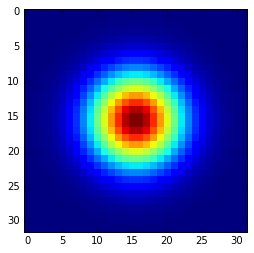

In [47]:
imshow(g, interpolation="nearest")